In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('final_Ashrae.csv')
df.head()

,Season,Building type,Cooling startegy_building level,Climate,Thermal sensation,Koppen climate classification,Clo,Met,Thermal preference,Relative humidity,Air velocity,Country,Air temperature
0,2,2,0,5,-1.3,5,0.57,1.0,1,36.8,0.27,15,24.3
1,2,2,0,5,-1.4,5,0.57,1.1,1,33.1,0.09,15,25.7
2,2,2,0,5,0.6,5,0.57,1.1,1,34.9,0.06,15,24.6
3,2,2,0,5,0.5,5,0.57,1.0,1,31.7,0.13,15,26.4
4,2,2,0,5,1.6,5,0.57,1.0,1,33.3,0.07,15,25.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU
from tensorflow.keras.utils import to_categorical

# Separate features and target
X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Reshape input data to be compatible with Conv2D (image-like data, e.g., 2D grid with one channel)
# Reshape to (samples, height, width, channels), in this case we can consider it as one row (height) and multiple columns (width)
X = X.reshape((X.shape[0], X.shape[1], 1, 1))  # 1xN format where N is the number of features (columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Convolutional Neural Network (CNN) Model
model = Sequential([
    Conv2D(64, (1, 1), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='linear'),
    ReLU(),  # ReLU activation
    MaxPooling2D(pool_size=(1, 1)),
    Dropout(0.3),
    Conv2D(128, (1, 1), activation='linear'),
    ReLU(),  # ReLU activation
    MaxPooling2D(pool_size=(1, 1)),
    Dropout(0.3),
    Conv2D(256, (1, 1), activation='linear'),
    ReLU(),  # ReLU activation
    MaxPooling2D(pool_size=(1, 1)),
    Dropout(0.3),
    Flatten(),  # Flatten the output from convolutional layers
    Dense(128),
    ReLU(),  # ReLU activation
    Dropout(0.3),
    Dense(64),
    ReLU(),  # ReLU activation
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6864 - loss: 0.7442 - val_accuracy: 0.7498 - val_loss: 0.6117
Epoch 2/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7379 - loss: 0.6411 - val_accuracy: 0.7577 - val_loss: 0.6016
Epoch 3/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7440 - loss: 0.6249 - val_accuracy: 0.7569 - val_loss: 0.5879
Epoch 4/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7474 - loss: 0.6151 - val_accuracy: 0.7621 - val_loss: 0.5828
Epoch 5/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7507 - loss: 0.6068 - val_accuracy: 0.7577 - val_loss: 0.5832
Epoch 6/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7525 - loss: 0.6046 - val_accuracy: 0.7660 - val_loss: 0.5784
Epoch 7/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7565 - loss: 0.5941 - val_accuracy: 0.7651 - val_loss: 0.5770
Epoch 8/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7554 - loss: 

In [14]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Separate features and target
X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Reshape input data to be compatible with Conv2D (image-like data, e.g., 2D grid with one channel)
X = X.reshape((X.shape[0], X.shape[1], 1, 1))  # 1xN format where N is the number of features (columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with tunable hyperparameters
def build_model(hp):
    model = Sequential([
        Conv2D(
            hp.Int('conv1_filters', min_value=32, max_value=128, step=32), 
            (1, 1), 
            input_shape=(X_train.shape[1], X_train.shape[2], 1),
            activation='linear', 
            kernel_regularizer=l2(hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.001))
        ),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D(pool_size=(1, 1)),
        Dropout(0.3),
        
        Conv2D(
            hp.Int('conv2_filters', min_value=64, max_value=256, step=64), 
            (1, 1),
            activation='linear', 
            kernel_regularizer=l2(hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.001))
        ),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D(pool_size=(1, 1)),
        Dropout(0.3),
        
        Flatten(),
        Dense(
            hp.Int('dense_units', min_value=64, max_value=256, step=64), 
            kernel_regularizer=l2(0.01)
        ),
        BatchNormalization(),
        ReLU(),
        Dropout(0.3),
        
        Dense(64, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        ReLU(),
        Dropout(0.3),
        
        Dense(y.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the Keras Tuner with Hyperband
tuner = kt.Hyperband(
    build_model, 
    objective='val_accuracy', 
    max_epochs=50, 
    factor=3,  # Lowered factor to speed up the search
    directory='hyperband_results_CNN', 
    project_name='thermal_preference'
)

# EarlyStopping callback to stop training when validation loss isn't improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model with the best hyperparameters
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Trial 82 Complete [00h 05m 17s]
val_accuracy: 0.7482131719589233

Best val_accuracy So Far: 0.7523994445800781
Total elapsed time: 01h 40m 08s

Search: Running Trial #83

Value             |Best Value So Far |Hyperparameter
96                |64                |conv1_filters
0.071             |0.043             |l2_reg
256               |192               |conv2_filters
192               |64                |dense_units
50                |50                |tuner/epochs
17                |17                |tuner/initial_epoch
1                 |3                 |tuner/bracket
1                 |3                 |tuner/round
0081              |0047              |tuner/trial_id

Epoch 18/50
1225/1225 - 28s - 23ms/step - accuracy: 0.7181 - loss: 0.8208 - val_accuracy: 0.7331 - val_loss: 0.7789
Epoch 19/50


KeyboardInterrupt: 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 12, 1, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 12, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 1, 128)          │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 12, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 1, 256)          │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 12, 1, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 1, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 1, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,803 (5.07 MB)

 Trainable params: 443,267 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 886,536 (3.38 MB)

In [18]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      6153
           1       0.80      0.74      0.77      4046
           2       0.74      0.65      0.69      2044

    accuracy                           0.77     12243
   macro avg       0.77      0.74      0.75     12243
weighted avg       0.77      0.77      0.77     12243



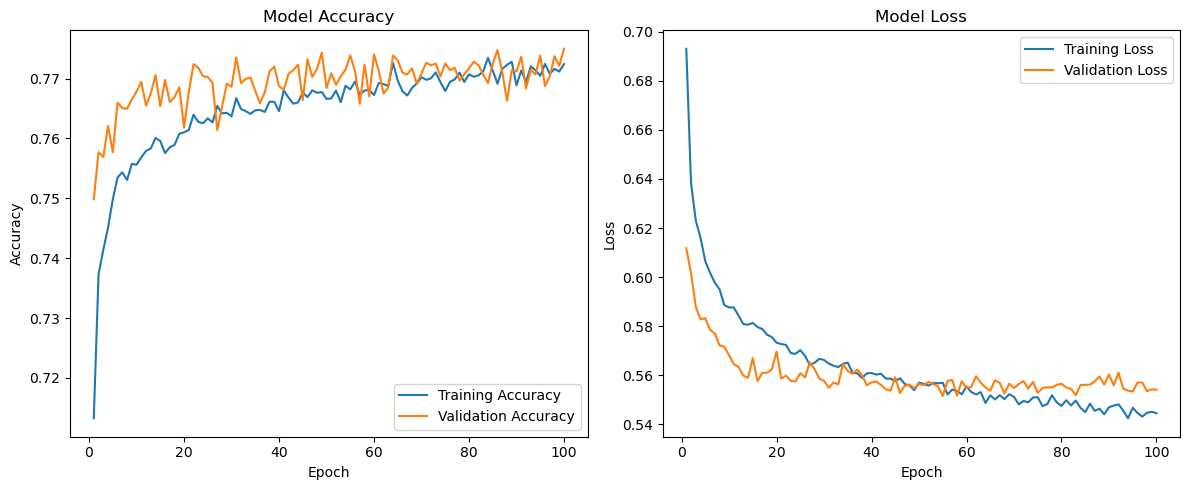

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


# normal model

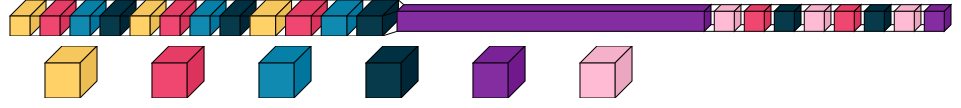

In [22]:
from PIL import ImageFont
import visualkeras
from tensorflow.keras import layers

# Load font
font = ImageFont.truetype("arial.ttf", 32)

# Add a Flatten layer to the model (or use your existing model)
model.add(layers.Flatten())

# Visualize model architecture using visualkeras
visualkeras.layered_view(model, legend=True, font=font)


383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      6153
           1       0.80      0.74      0.77      4046
           2       0.74      0.65      0.69      2044

    accuracy                           0.77     12243
   macro avg       0.77      0.74      0.75     12243
weighted avg       0.77      0.77      0.77     12243



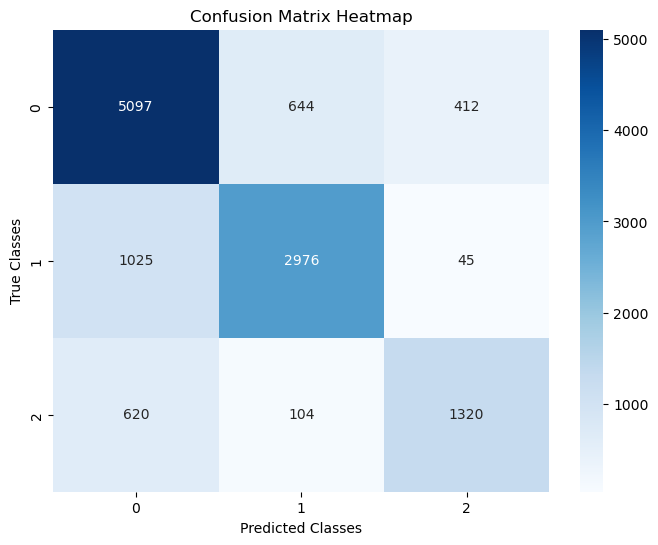

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()
